In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
from sklearn.cluster import KMeans
pl.style.use('fivethirtyeight')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
od = pd.read_pickle(os.path.expandvars('$PUI2015/od.pkl'))

In [3]:
# replace all NaN values with 0
# this is a huge assumption on my part, and we might want to discuss whether or not this is prudent
od = od.fillna(0)

# set a threshold of 25 jobs over the course of 12 years, so as to take a substantive sample
# 25 was chosen very arbitrarily and might be a bad value, again we should discuss this
od_cut = od[(od[0] + od[1] + od[2] + od[3] + od[4] + od[5] + od[6] + od[7] + od[8] + od[9] + od[10] + od[11]) > 25]

In [4]:
# print shape of dataframe
print od_cut.shape

(229039, 14)


In [5]:
# limit OD data to jobs
od_cut_jobs = od_cut[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

# normalize according to J'=(J-<J>)/std(J)
od_norm = od_cut_jobs.sub(od_cut_jobs.mean(axis=1), axis=0)
od_norm = od_norm.div(od_cut_jobs.std(axis=1), axis=0)

In [6]:
# put dataframe values into an array for clustering
od_array = od_norm.values

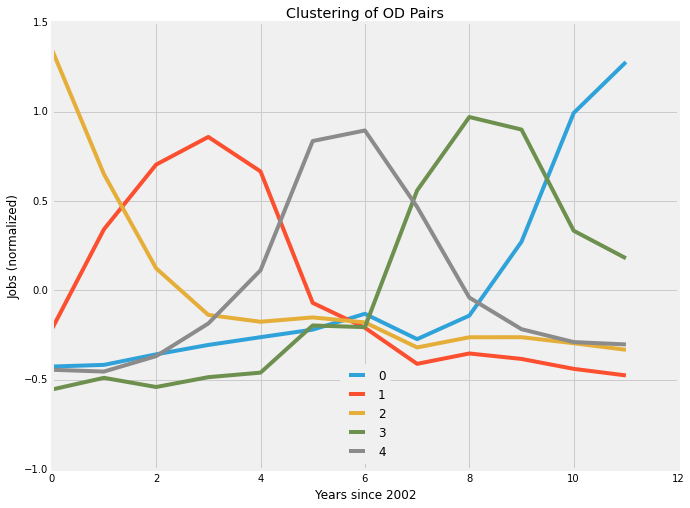

In [7]:
# perform clustering and plotting
fig = pl.figure(figsize=(10, 8))
pl.title('Clustering of OD Pairs')
pl.xlabel('Years since 2002')
pl.ylabel('Jobs (normalized)')

kmeans = KMeans(n_clusters=5)
kmeans.fit(od_array)
for i in range(5):
    pl.plot(kmeans.cluster_centers_[i], label = i)
    
pl.legend(loc='lower center')

## Plot the individual lines for each cluster, overlaying cluster centers.
## Limit to 100 lines per plot, or else it becomes impossible to see individual lines (though the trend persists).

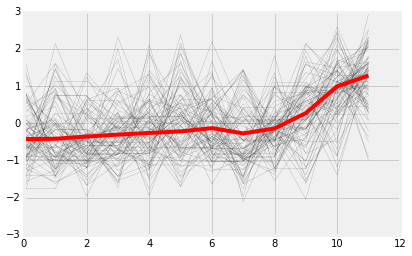

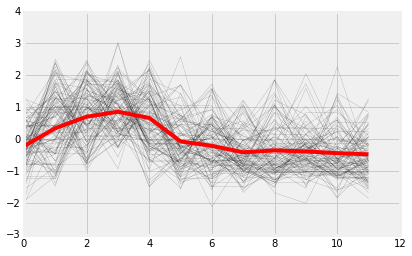

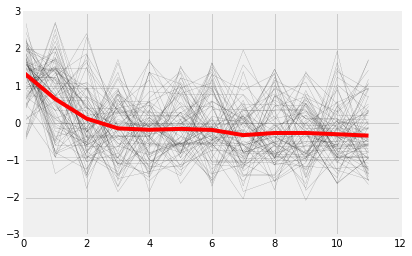

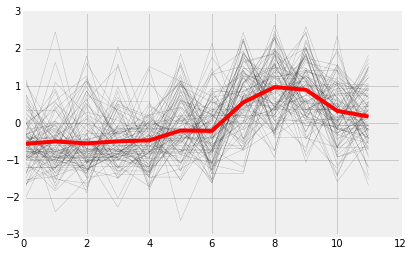

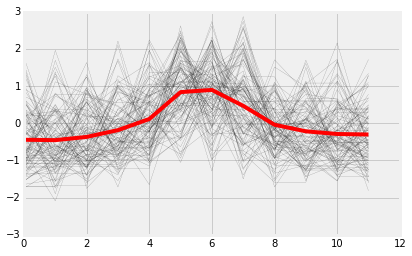

In [8]:
for j in range(kmeans.n_clusters):
    index = kmeans.labels_ == j
    pl.figure()
    for ii in range (0, len(od_array), 500):
        if index[ii] == True:   
            pl.plot(od_array[ii], color = 'k', lw = 0.1)
    pl.plot(kmeans.cluster_centers_[j], color = 'red')